In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/sruja/OneDrive/Desktop/The Dataset.csv")

In [3]:
df.shape

(1199, 7)

In [4]:
df.head()

,Date,Opening Amount,Highest Amount,Lowest Amount,Closing Amount,Volume,Market Cap
0,11-Nov-22,$3.52,$3.68,$2.47,$2.59,"$617,326,125","$344,592,944"
1,10-Nov-22,$2.29,$4.20,$2.14,$3.52,"$989,320,627","$467,843,435"
2,9-Nov-22,$5.52,$6.25,$2.06,$2.30,"$1,320,745,564","$306,042,785"
3,8-Nov-22,$22.14,$22.14,$3.15,$5.52,"$3,346,184,382","$734,156,443"
4,7-Nov-22,$22.26,$23.15,$21.92,$22.14,"$721,168,869","$2,945,482,807"


In [5]:
#Convert Data Types
df['Opening Amount'] = df['Opening Amount'].replace({'\$': '', ',': '', 'B': ''}, regex=True)
df['Highest Amount'] = df['Highest Amount'].replace({'\$': '', ',': '', 'B': ''}, regex=True)
df['Lowest Amount'] = df['Lowest Amount'].replace({'\$': '', ',': '', 'B': ''}, regex=True)
df['Closing Amount'] = df['Closing Amount'].replace({'\$': '', ',': '', 'B': ''}, regex=True)
df['Volume'] = df['Volume'].replace({'\$': '', ',': '', 'B': ''}, regex=True)
df['Market Cap'] = df['Market Cap'].replace({'\$': '', ',': '', 'B': ''}, regex=True)

df['Opening Amount'] = pd.to_numeric(df['Opening Amount'], errors='coerce')
df['Highest Amount'] = pd.to_numeric(df['Highest Amount'], errors='coerce')
df['Lowest Amount'] = pd.to_numeric(df['Lowest Amount'], errors='coerce')
df['Closing Amount'] = pd.to_numeric(df['Closing Amount'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
pd.set_option('display.float_format', '{:.2f}'.format)


In [6]:
df.head()

,Date,Opening Amount,Highest Amount,Lowest Amount,Closing Amount,Volume,Market Cap
0,11-Nov-22,3.52,3.68,2.47,2.59,617326125,344592944
1,10-Nov-22,2.29,4.20,2.14,3.52,989320627,467843435
2,9-Nov-22,5.52,6.25,2.06,2.30,1320745564,306042785
3,8-Nov-22,22.14,22.14,3.15,5.52,3346184382,734156443
4,7-Nov-22,22.26,23.15,21.92,22.14,721168869,2945482807


In [7]:
#Handle Missing Data:
print("Missing Data:")
print(df.isnull().sum())

Missing Data:
Date              0
Opening Amount    0
Highest Amount    0
Lowest Amount     0
Closing Amount    0
Volume            0
Market Cap        0
dtype: int64


In [8]:
df['Opening Amount'] = df['Opening Amount'].interpolate(method='linear', limit_direction='forward')
df['Highest Amount'] = df['Highest Amount'].interpolate(method='linear', limit_direction='forward')
df['Lowest Amount'] = df['Lowest Amount'].interpolate(method='linear', limit_direction='forward')
df['Closing Amount'] = df['Closing Amount'].interpolate(method='linear', limit_direction='forward')
df['Volume'] = df['Volume'].interpolate(method='linear', limit_direction='forward')
df['Market Cap'] = df['Market Cap'].interpolate(method='linear', limit_direction='forward')

In [9]:
df.fillna(method='bfill', inplace=True)
from scipy import stats


In [10]:
df.head()

,Date,Opening Amount,Highest Amount,Lowest Amount,Closing Amount,Volume,Market Cap
0,11-Nov-22,3.52,3.68,2.47,2.59,617326125,344592944
1,10-Nov-22,2.29,4.20,2.14,3.52,989320627,467843435
2,9-Nov-22,5.52,6.25,2.06,2.30,1320745564,306042785
3,8-Nov-22,22.14,22.14,3.15,5.52,3346184382,734156443
4,7-Nov-22,22.26,23.15,21.92,22.14,721168869,2945482807


In [11]:
#Outlier Detection:
def remove_outliers(df, column, threshold=3):
    # Calculate Z-scores for the entire column, ignoring NaN values
    z_scores = np.abs(stats.zscore(df[column].dropna()))  # Drop NaN values before calculating Z-score
    # Get the indexes of rows that do not exceed the threshold
    non_outliers = df[column].index[np.abs(stats.zscore(df[column])) < threshold]
    df_cleaned = df.loc[non_outliers]  # Filter the rows with valid (non-outlier) Z-scores
    return df_cleaned

In [12]:
df = remove_outliers(df, 'Volume')
df = remove_outliers(df, 'Closing Amount')

In [13]:
#Normalize Market Cap: 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Market Cap Normalized'] = scaler.fit_transform(df[['Market Cap']])


In [14]:
df.head()


,Date,Opening Amount,Highest Amount,Lowest Amount,Closing Amount,Volume,Market Cap,Market Cap Normalized
0,11-Nov-22,3.52,3.68,2.47,2.59,617326125,344592944,0.04
4,7-Nov-22,22.26,23.15,21.92,22.14,721168869,2945482807,0.34
5,6-Nov-22,24.06,24.83,21.73,22.27,599958722,2962384378,0.34
6,5-Nov-22,25.47,25.81,23.96,24.06,108438472,3200506373,0.37
7,4-Nov-22,24.36,25.80,24.15,25.47,117760400,3388498100,0.39


In [15]:
print(df.isnull().sum())


Date                     0
Opening Amount           0
Highest Amount           0
Lowest Amount            0
Closing Amount           0
Volume                   0
Market Cap               0
Market Cap Normalized    0
dtype: int64


C:\Users\sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sruja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


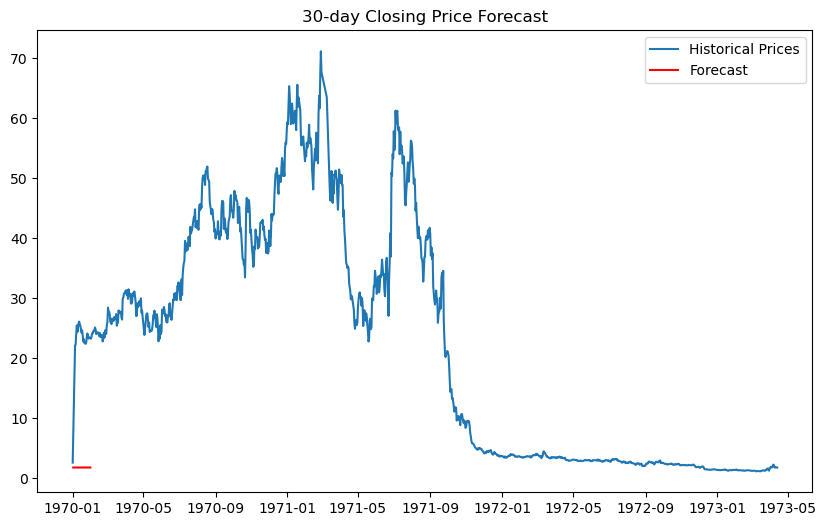

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# Fit ARIMA model (p=1, d=1, q=1 as an example)
model = ARIMA(df['Closing Amount'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Closing Amount'], label='Historical Prices')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('30-day Closing Price Forecast')
plt.show()



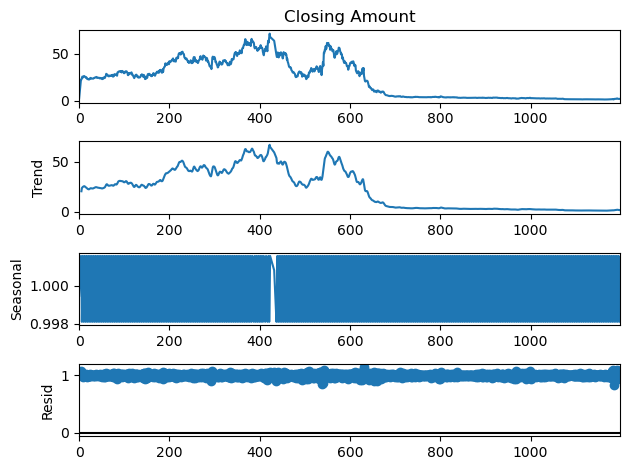

In [17]:
#Detect Seasonal Trends: Identify recurring patterns in stock prices using decomposition techniques.
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Closing Amount'], model='multiplicative', period=4)

# Plot the decomposition
result.plot()
plt.show()


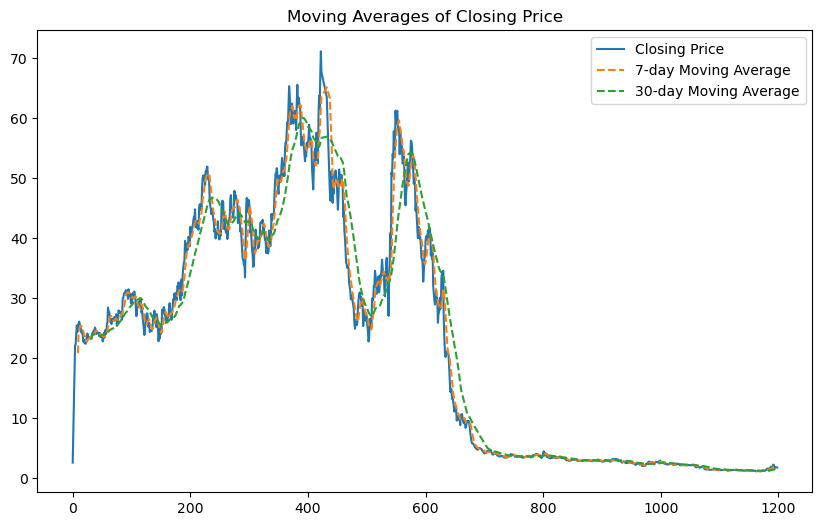

In [18]:
# Compute 7-day and 30-day moving averages
df['7-day MA'] = df['Closing Amount'].rolling(window=7).mean()
df['30-day MA'] = df['Closing Amount'].rolling(window=30).mean()

# Plot the moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Closing Amount'], label='Closing Price')
plt.plot(df['7-day MA'], label='7-day Moving Average', linestyle='--')
plt.plot(df['30-day MA'], label='30-day Moving Average', linestyle='--')
plt.legend()
plt.title('Moving Averages of Closing Price')
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Ensure the data is sorted by date
df['Date'] = pd.to_datetime(df['Date'])

# Ensure the DataFrame is sorted by 'Date'
df = df.sort_values('Date')

# Set the 'Date' column as the index for resampling
df.set_index('Date', inplace=True)
# Calculate daily volatility as the difference between 'Highest Amount' and 'Lowest Amount'
df['Daily Volatility'] = df['Highest Amount'] - df['Lowest Amount']

# Group by month and sum the daily volatilities
monthly_volatility = df['Daily Volatility'].resample('M').sum()

# Identify the month with the highest volatility
most_volatile_month = monthly_volatility.idxmax()
highest_volatility = monthly_volatility.max()

# Display the most volatile month
print(f"Most volatile month: {most_volatile_month}")
print(f"Highest volatility: {highest_volatility}")


Most volatile month: 2021-05-31 00:00:00
Highest volatility: 168.28


In [20]:
#Stock Volatility Detection:
import numpy as np

# Calculate daily volatility as the difference between Highest and Lowest prices
df['Daily Volatility'] = df['Highest Amount'] - df['Lowest Amount']

# Extract the month and year from the Date index
df['Month-Year'] = df.index.to_period('M')

# Group by Month-Year and calculate the mean volatility per month
monthly_volatility = df.groupby('Month-Year')['Daily Volatility'].mean()

# Sort to find the most volatile months
most_volatile_months = monthly_volatility.sort_values(ascending=False)

# Display the most volatile months
most_volatile_months

Month-Year
2021-09   5.93
2021-05   5.43
2021-08   4.33
2021-04   3.98
2021-10   3.71
2021-11   3.38
2022-01   3.14
2021-02   2.84
2021-03   2.79
2021-12   2.63
2022-02   2.63
2021-06   2.58
2022-04   2.10
2021-07   2.07
2022-05   2.03
2022-03   2.00
2022-06   1.98
2022-07   1.55
2022-11   1.51
2022-08   1.35
2022-09   1.12
2021-01   1.11
2022-10   0.75
2020-12   0.24
2020-09   0.23
2020-11   0.20
2019-08   0.18
2020-08   0.17
2020-03   0.17
2020-02   0.16
2020-10   0.14
2020-04   0.13
2020-05   0.13
2020-07   0.10
2020-06   0.09
2019-12   0.09
2020-01   0.09
2019-09   0.07
2019-10   0.06
2019-11   0.05
Freq: M, Name: Daily Volatility, dtype: float64

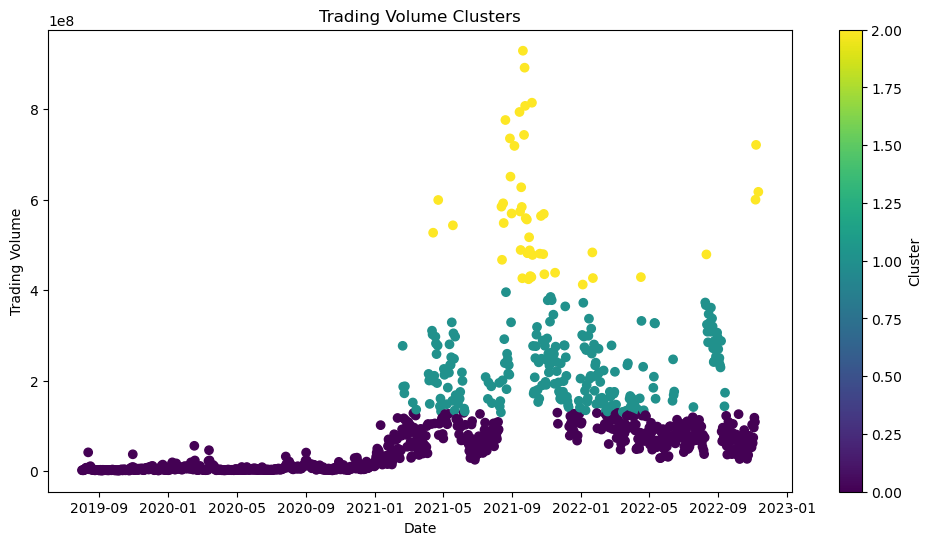

In [21]:
#Trading Volume Trends
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract trading volume data
volume_data = df[['Volume']].dropna()

# Apply KMeans clustering (assume we want 3 clusters: low, medium, high volume)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Volume Cluster'] = kmeans.fit_predict(volume_data)

# Visualize the clusters
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Volume'], c=df['Volume Cluster'], cmap='viridis', label='Clustered Days')
plt.title('Trading Volume Clusters')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.colorbar(label='Cluster')
plt.show()


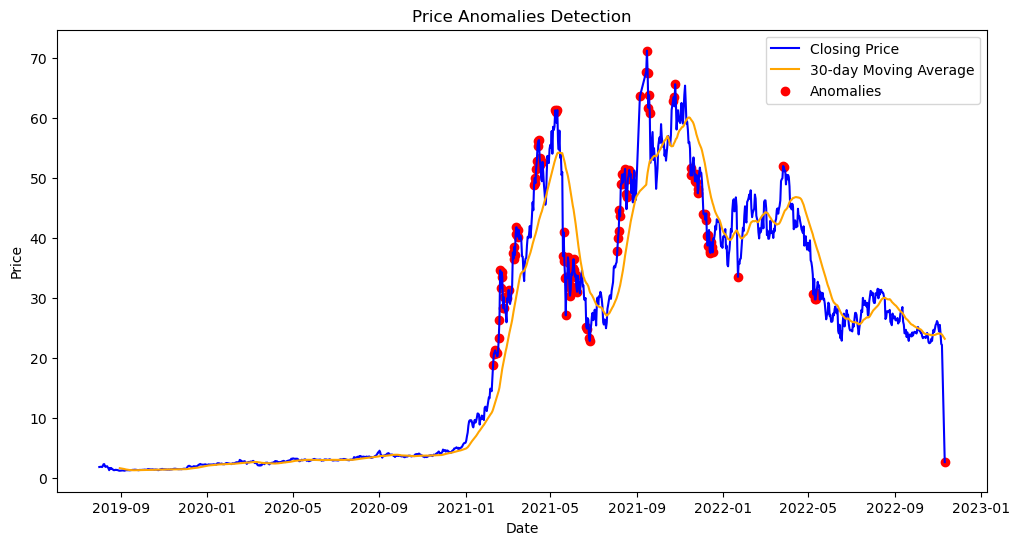

In [22]:
# Calculate 30-day moving average for 'Closing Amount'
df['30-day MA'] = df['Closing Amount'].rolling(window=30).mean()

# Calculate deviation from moving average
df['Deviation'] = abs(df['Closing Amount'] - df['30-day MA'])

# Set a threshold (e.g., 2 standard deviations from the moving average)
threshold = df['Deviation'].std() * 2  # You can adjust this value

# Identify anomalies where deviation exceeds threshold
df['Anomaly'] = df['Deviation'] > threshold

# Plotting the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Closing Amount'], label='Closing Price', color='blue')
plt.plot(df.index, df['30-day MA'], label='30-day Moving Average', color='orange')

# Highlight anomalies
plt.scatter(df.index[df['Anomaly']], df['Closing Amount'][df['Anomaly']], color='red', label='Anomalies', marker='o')

plt.title('Price Anomalies Detection')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [23]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare data for regression (assuming 'data' is the preprocessed DataFrame)
X = df[['Opening Amount', 'Highest Amount', 'Lowest Amount', 'Volume', 'Market Cap Normalized']]  # Features
y = df['Closing Amount']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")


Linear Regression Evaluation:
MAE: 0.36647614667669864
MSE: 0.4589456498235602
RMSE: 0.6774552751463082
R²: 0.998788695091588


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the target variable (1 for crash, 0 for no crash)
df['Price Drop'] = (df['Closing Amount'].pct_change() < -0.05).astype(int)

# Prepare the features and target for classification
X_class = df[['Opening Amount', 'Highest Amount', 'Lowest Amount', 'Volume', 'Market Cap Normalized']]
y_class = df['Price Drop']

# Split the data into training and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluate the classification model
print("Market Crash Prediction Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print(classification_report(y_test_class, y_pred_class))



Market Crash Prediction Evaluation:
Accuracy: 0.890295358649789
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       212
           1       0.40      0.08      0.13        25

    accuracy                           0.89       237
   macro avg       0.65      0.53      0.54       237
weighted avg       0.85      0.89      0.86       237



In [25]:
import matplotlib.pyplot as plt

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Get the feature importances from the Random Forest Regressor
feature_importances = rf_regressor.feature_importances_

# Plot feature importances
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Print feature importances
for feature, importance in zip(features, feature_importances):
    print(f'{feature}: {importance}')


NameError: name 'RandomForestRegressor' is not defined

In [26]:
# Define the target variable (1 for volume spike, 0 for no spike)
df['Volume Spike'] = (df['Volume'].pct_change() > 0.20).astype(int)

# Prepare the features and target for classification
X_volume = df[['Opening Amount', 'Highest Amount', 'Lowest Amount', 'Closing Amount', 'Market Cap Normalized']]
y_volume = df['Volume Spike']

# Split the data into training and test sets
X_train_volume, X_test_volume, y_train_volume, y_test_volume = train_test_split(X_volume, y_volume, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier for volume spikes
rf_volume_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_volume_model.fit(X_train_volume, y_train_volume)

# Make predictions
y_pred_volume = rf_volume_model.predict(X_test_volume)

# Evaluate the classification model
print("Volume Spike Prediction Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_volume, y_pred_volume)}")
print(classification_report(y_test_volume, y_pred_volume))



Volume Spike Prediction Evaluation:
Accuracy: 0.6286919831223629
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       159
           1       0.38      0.21      0.27        78

    accuracy                           0.63       237
   macro avg       0.53      0.52      0.51       237
weighted avg       0.58      0.63      0.59       237



In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the data (assuming 'data' is already preprocessed and cleaned)
X = df[['Opening Amount', 'Highest Amount', 'Lowest Amount', 'Volume', 'Market Cap Normalized']]
y = df['Closing Amount']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
print("Stock Price Prediction Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

# Cross-validation to check model performance across folds
cv_scores_rf = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores (Random Forest): {-cv_scores_rf.mean()}")



Stock Price Prediction Evaluation:
MAE: 0.3631046413502099
MSE: 0.467602783122361
RMSE: 0.6838148748911221
R²: 0.9987658461375525
Cross-Validation Scores (Random Forest): 13.507809298064732


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters for Stock Price Prediction:", grid_search.best_params_)


Best Hyperparameters for Stock Price Prediction: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Regressor Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"R²: {r2_score(y_test, y_pred_xgb)}")


XGBoost Regressor Evaluation:
MAE: 0.46353563711110046
MSE: 0.7050474652248018
RMSE: 0.8396710458416449
R²: 0.9981391533929592


In [30]:
#After using linear,random,xgb regressors for price stock prediction , random regressor is most convenient with less errors.